UM MSBA - BGEN

# Week 9 Instructor-Led Lab: Descriptive Statistics
---
    Author: Ellery Bresler
    Course: BGEN632 Grad. Intro. to Python
    Term: Spring 2025
    Date: April 28, 2025


## 	&#x1f4bb; California Hospitals: Descriptive Statistics	&#x1f4bb;

I belong to a team assigned to assess the condition of the healthcare system in California. You currently work in the Information Systems department for a consulting firm working with the state government agency that oversees the healthcare system in California. The data I will use for this lab are as followed:

* Data for 61 hospitals in the file [CaliforniaHospitalData.csv](/data/CaliforniaHospitalData.csv)
* Personnel data containing employee information within the file [CaliforniaHospitalData_Personnel.txt](/data/CaliforniaHospitalData_Personnel.txt)


#### Import Modules 

In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts # for QQ plot
from scipy.stats import pearsonr # correlation p-values
from sklearn.linear_model import LinearRegression # regression output
import statsmodels.formula.api as smf # ols regression

#### Set Working Directory & Accessing Data 

In [45]:
os.chdir("/Users/ElleryBresler/Documents/GitHub/week9labs/data")  # change this to your filepath

ca_hospital_data = pd.read_csv("CaliforniaHospitalData.csv") # load the file

ca_hospital_personnel = pd.read_csv('CaliforniaHospitalData_Personnel.txt', delimiter='\t')
ca_hospital_personnel.to_csv('CaliforniaHospitalData_Personnel.csv', index=False)

#####  Prep Data and Add A New Record

In [46]:
hospital_merge = ca_hospital_data.merge(ca_hospital_personnel, how='left', on='HospitalID')

hospital_merge = hospital_merge.drop(['Work_ID', 'PositionID','Website'], axis = 1)

##### Adding New Record

In [47]:
new_row = pd.DataFrame({'HospitalID': ['28283'], 
                        'Name': ['Hi-Desert Medical Center'], 
                        'Zip': ['92252'], 
                        'TypeControl': ['District'], 
                        'Teaching': ['Small/Rural'], 
                        'DonorType': ['Charity'],
                        'NoFTE': [451.5], 
                        'NetPatRev': [145733.57650], 
                        'InOperExp': [3.184268e+07],	
                        'OutOperExp': [2.118493e+07], 
                        'OperRev': [53619042], 
                        'OperInc': [591431], 
                        'AvlBeds': [179],
                        'LastName':['Bresler'], 
                        'FirstName':['Ellery'], 
                        'Gender': ['F'], 
                        'PositionTitle': ['State Board Representative'], 
                        'Compensation': [89473],
                        'MaxTerm': [3], 
                        'StartDate': ['4/28/2025'], 
                        'Phone': ['406-999-9999'], 
                        'Email': ['ellery.bresler@gmail.com']},
                       index = [61]
                      )

In [48]:
# merge new rows with existing data
ca_hospital_personel_merge = pd.concat([hospital_merge, new_row], ignore_index = True)

#Displaying new row
ca_hospital_personel_merge.iloc[61]

HospitalID                            28283
Name               Hi-Desert Medical Center
Zip                                   92252
TypeControl                        District
Teaching                        Small/Rural
DonorType                           Charity
NoFTE                                 451.5
NetPatRev                       145733.5765
InOperExp                        31842680.0
OutOperExp                       21184930.0
OperRev                            53619042
OperInc                              591431
AvlBeds                                 179
LastName                            Bresler
FirstName                            Ellery
Gender                                    F
PositionTitle    State Board Representative
Compensation                          89473
MaxTerm                                   3
StartDate                         4/28/2025
Phone                          406-999-9999
Email              ellery.bresler@gmail.com
Name: 61, dtype: object

In [49]:
#converting Date-Time
ca_hospital_personel_merge['StartDate'] = pd.to_datetime(ca_hospital_personel_merge['StartDate'], errors='coerce')

In [50]:
#changing the categorical columns and converting them from object to category
for col in ca_hospital_personel_merge.select_dtypes(include='object').columns:
    ca_hospital_personel_merge[col] = ca_hospital_personel_merge[col].astype('category')

In [51]:
ca_hospital_personel_merge.dtypes # checking datatypes

HospitalID             category
Name                   category
Zip                    category
TypeControl            category
Teaching               category
DonorType              category
NoFTE                   float64
NetPatRev               float64
InOperExp               float64
OutOperExp              float64
OperRev                   int64
OperInc                   int64
AvlBeds                   int64
LastName               category
FirstName              category
Gender                 category
PositionTitle          category
Compensation              int64
MaxTerm                   int64
StartDate        datetime64[ns]
Phone                  category
Email                  category
dtype: object

#### Descriptive Statistics 

Please produce the following summary statistics:
* Provide a summary of the mean, median, minimum value, and maximum value for each numeric variable.
* Provide summary statistics of your text variables.
* Provide summary statistics of your categorical variables.

In [52]:
ca_hospital_personel_merge.describe()

,NoFTE,NetPatRev,InOperExp,OutOperExp,OperRev,OperInc,AvlBeds,Compensation,MaxTerm,StartDate
count,62.000000,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,6.200000e+01,62.000000,62.000000,62.000000,62
mean,1335.768065,6.611344e+05,1.641024e+08,8.904561e+07,2.530047e+08,-1.433042e+05,194.274194,92721.467742,4.225806,2010-04-30 12:46:27.096774144
min,55.000000,1.417224e+04,1.436471e+06,3.787718e+06,5.235317e+06,-3.211633e+08,12.000000,23987.000000,2.000000,2002-01-01 00:00:00
25%,216.375000,7.284830e+04,1.382645e+07,1.429398e+07,2.685966e+07,-1.028922e+06,42.750000,46978.000000,3.000000,2009-04-02 06:00:00
50%,385.910000,1.670720e+05,3.184268e+07,3.259692e+07,6.153388e+07,1.464124e+06,100.500000,46978.000000,4.000000,2011-01-01 00:00:00
75%,1137.000000,5.317051e+05,1.639284e+08,8.867309e+07,1.982414e+08,6.146421e+06,228.250000,89473.000000,4.000000,2012-01-01 00:00:00
max,8000.000000,4.662582e+06,1.285631e+09,6.621559e+08,1.912179e+09,1.648724e+08,909.000000,248904.000000,8.000000,2025-04-28 00:00:00
std,2011.856666,1.090511e+06,2.809792e+08,1.364412e+08,4.222723e+08,7.095578e+07,220.015958,83849.213062,2.099331,NaN


In [56]:
ca_hospital_personel_merge.describe(include=['category'])

,HospitalID,Name,Zip,TypeControl,Teaching,DonorType,LastName,FirstName,Gender,PositionTitle,Phone,Email
count,62,62,62,62,62,62,62,62,62,62,62,62
unique,62,61,61,4,2,2,24,20,2,4,25,25
top,10767,Hi-Desert Medical Center,92252,Non Profit,Small/Rural,Charity,Smith,David,F,Regional Representative,405-744-2238,akira.iwata@hsu.edu
freq,1,2,2,37,45,45,4,6,33,24,3,3


#### Create some visuals to explore the data:

##### Histograms
* Create histograms of the following variables: `NoFTE`, `NetPatRev`, `InOperExp`, `OutOperExp`, `OperRev`, `OperInc`, and `AvlBeds`.

<Axes: ylabel='Frequency'>

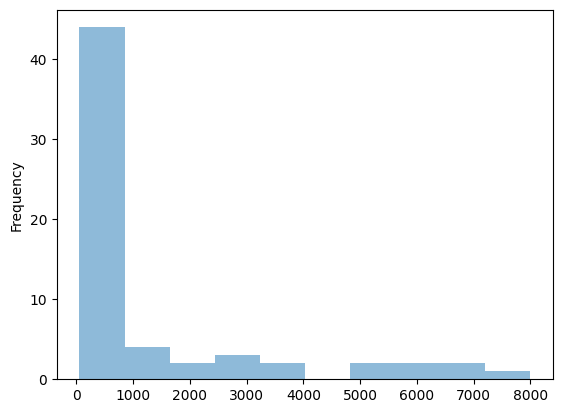

In [57]:
ca_hospital_personel_merge['NoFTE'].plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

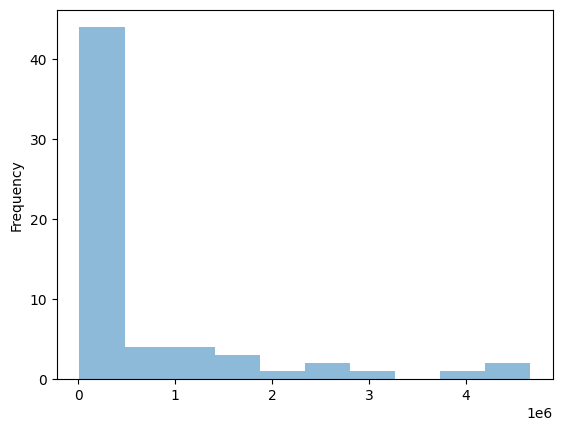

In [58]:
ca_hospital_personel_merge['NetPatRev'].plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

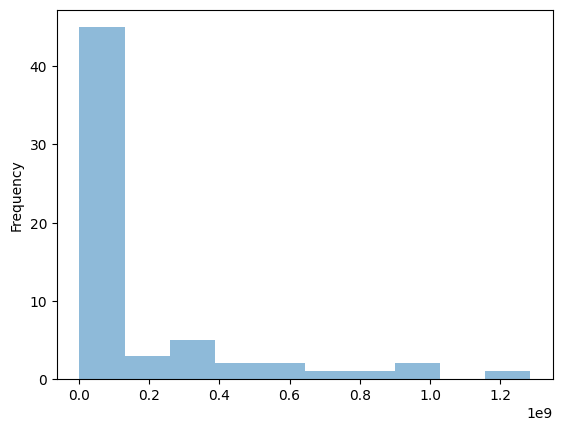

In [59]:
ca_hospital_personel_merge['InOperExp'].plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

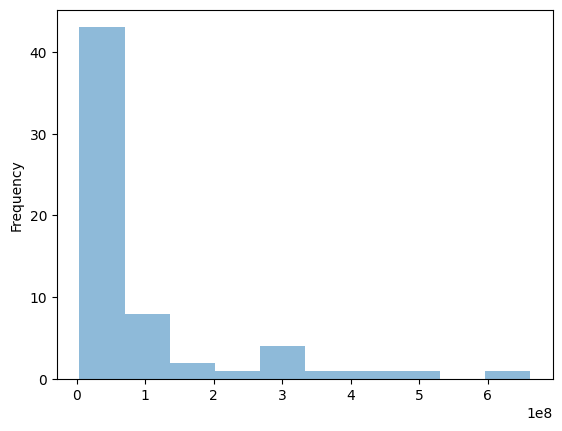

In [60]:
ca_hospital_personel_merge['OutOperExp'].plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

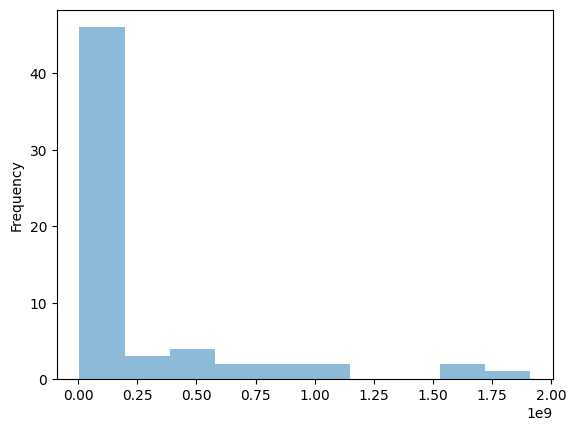

In [61]:
ca_hospital_personel_merge['OperRev'].plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

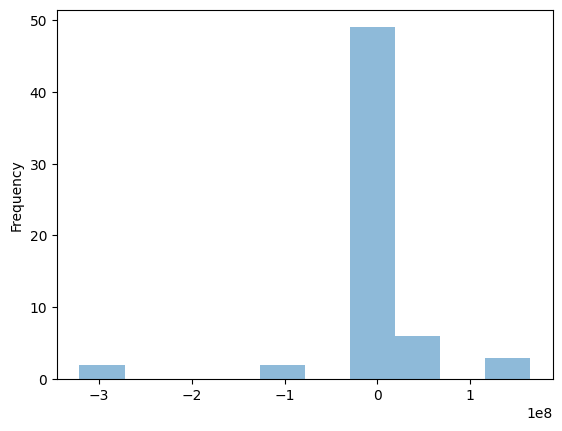

In [62]:
ca_hospital_personel_merge['OperInc'].plot.hist(alpha=0.5)

<Axes: ylabel='Frequency'>

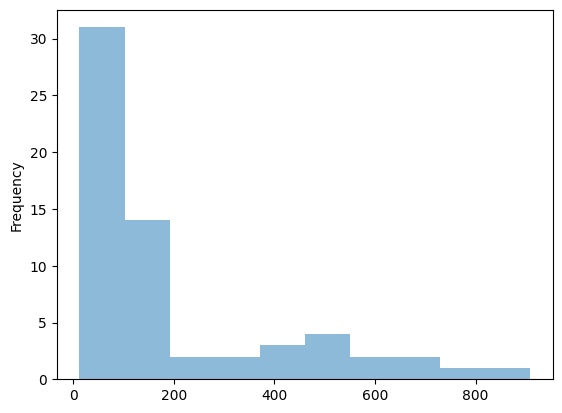

In [63]:
ca_hospital_personel_merge['AvlBeds'].plot.hist(alpha=0.5)

##### Scatterplots
* Create scatterplots of the following variables using *net patient revenue* as the target variable (i.e., place it on the *y*-axis): `NoFTE`, `InOperExp`, `OutOperExp`, `OperRev`, `OperInc`, and `AvlBeds`.
  * Describe the linearity and trend of each plot.

<Axes: xlabel='NoFTE', ylabel='NetPatRev'>

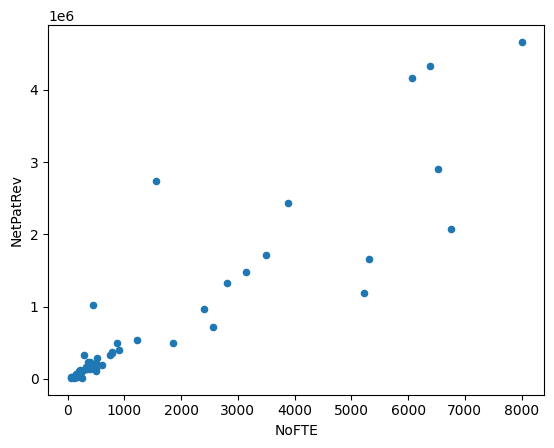

In [64]:
ca_hospital_personel_merge.plot.scatter(x='NoFTE', y='NetPatRev')

This is fairly linear at the start and does exhibit anomalies that raise a red flag. Linearity is potentially an issue. the trend is positive. 

<Axes: xlabel='InOperExp', ylabel='NetPatRev'>

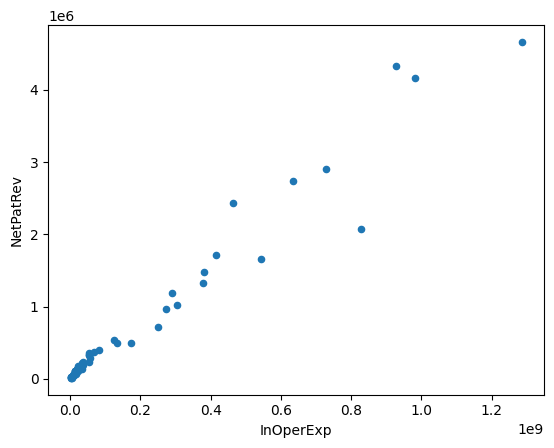

In [65]:
ca_hospital_personel_merge.plot.scatter(x='InOperExp', y='NetPatRev')

This is fairly linear and does not exhibit any curvature or other anomalies that would raise a red flag. Linearity is not an issue. The trend is positive. 

<Axes: xlabel='OutOperExp', ylabel='NetPatRev'>

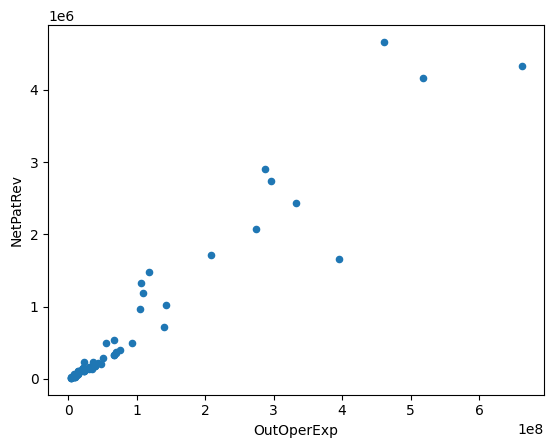

In [66]:
ca_hospital_personel_merge.plot.scatter(x='OutOperExp', y='NetPatRev')

This is fairly linear at the start and there appears to be some anomalies as both increase. The trend is positive. 

<Axes: xlabel='OperRev', ylabel='NetPatRev'>

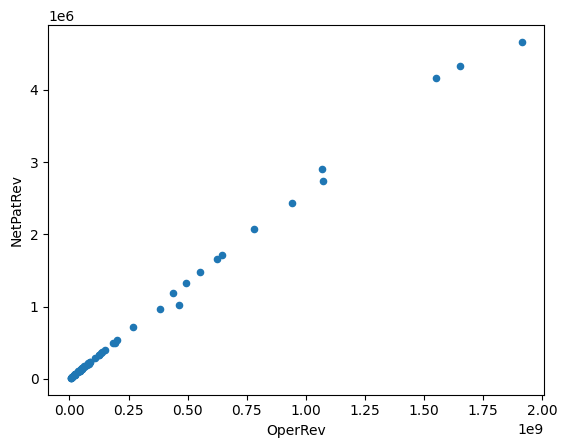

In [67]:
ca_hospital_personel_merge.plot.scatter(x='OperRev', y='NetPatRev')

This is linear and does not exhibit any curvature or other anomalies that would raise a red flag. Linearity is not an issue. The trend is positive. 

<Axes: xlabel='OperInc', ylabel='NetPatRev'>

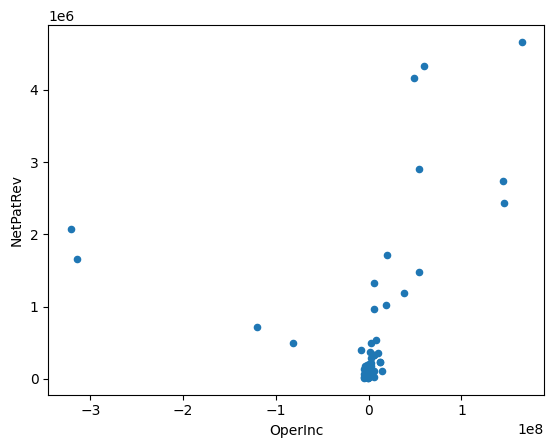

In [68]:
ca_hospital_personel_merge.plot.scatter(x='OperInc', y='NetPatRev')

This is not linear and exhibits curvature or other anomalies that would raise a red flag. Linearity is an issue.

<Axes: xlabel='OperInc', ylabel='AvlBeds'>

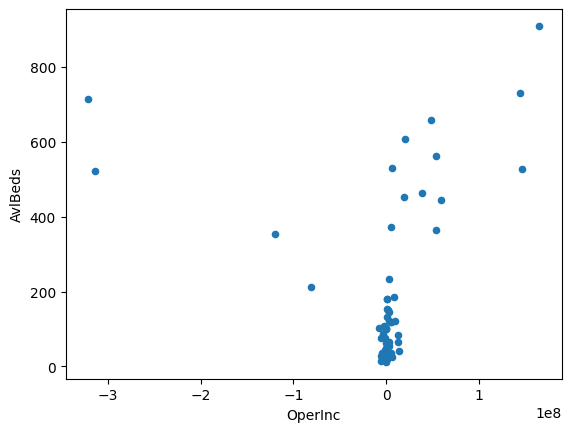

In [69]:
ca_hospital_personel_merge.plot.scatter(x='OperInc', y='AvlBeds')

This is not linear and exhibits curvature or other anomalies. Linearity is an issue. 

##### Boxplot 
* Create a boxplot and assess the lack or presence of outliers for the following variables: `NoFTE`, `NetPatRev`, `InOperExp`, `OutOperExp`, `OperRev`, `OperInc`, and `AvlBeds`. You may need to split the variables up due to the range of values in the data (like we did in the tutorial).
  * Choose three variables and create a QQ plot, providing your assessment of the normality.
  * Perform a Shapiro-Wilk test on those three variables; do your test results coincide with the QQ plots

<Axes: >

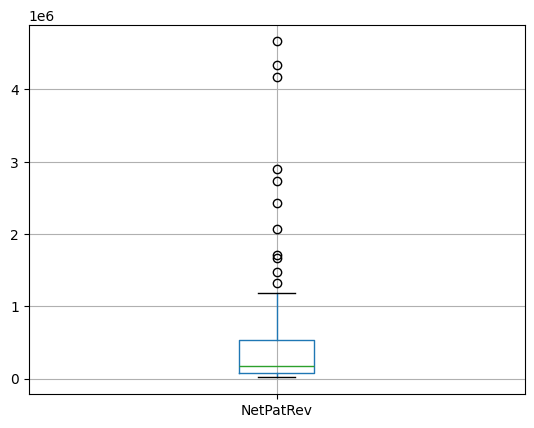

In [74]:
ca_hospital_personel_merge.loc[:,['NetPatRev']].boxplot()

<Axes: >

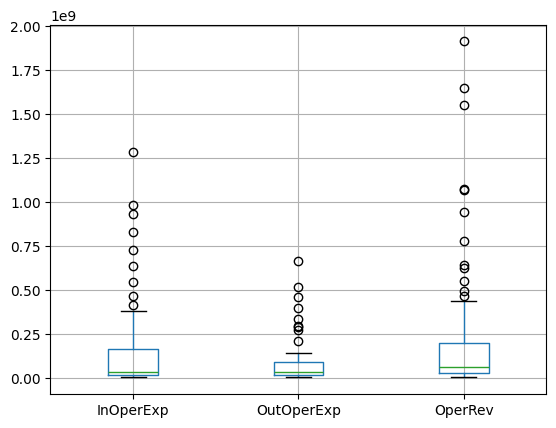

In [80]:
ca_hospital_personel_merge.loc[:,['InOperExp','OutOperExp','OperRev']].boxplot()

<Axes: >

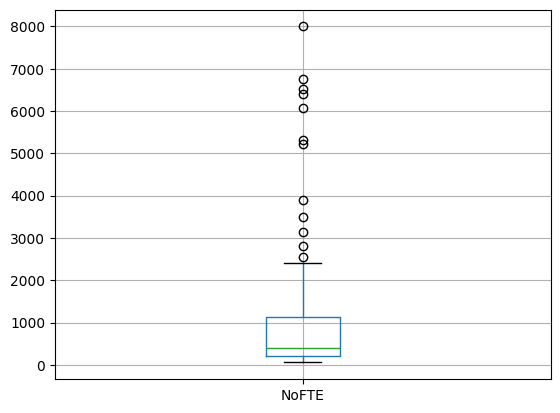

In [83]:
ca_hospital_personel_merge.loc[:,['NoFTE']].boxplot()

<Axes: >

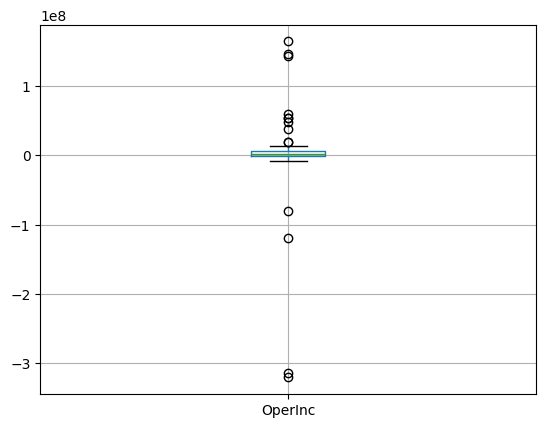

In [84]:
ca_hospital_personel_merge.loc[:,['OperInc']].boxplot()

<Axes: >

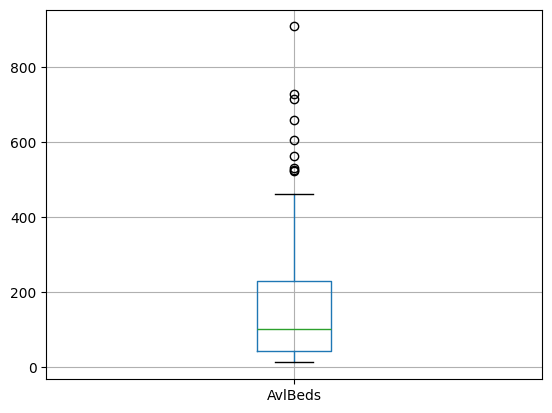

In [85]:
ca_hospital_personel_merge.loc[:,['AvlBeds']].boxplot()

* Choose three variables and create a QQ plot, providing your assessment of the normality.
* Perform a Shapiro-Wilk test on those three variables; do your test results coincide with the QQ plots

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([1.43647070e+06, 1.78096902e+06, 2.07687913e+06, 2.30923960e+06,
  

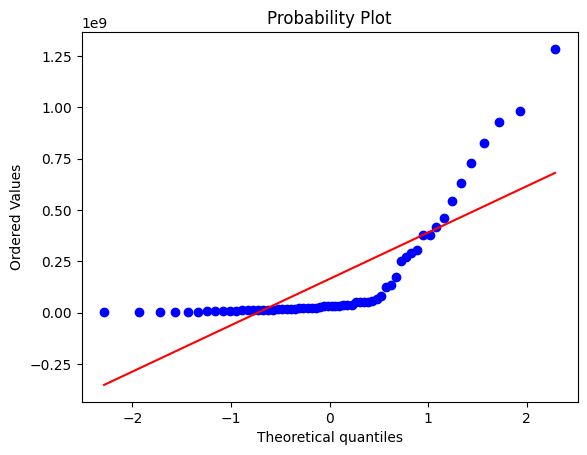

In [89]:
sts.probplot(ca_hospital_personel_merge.InOperExp , dist="norm", plot=plt)

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([-321163336, -314000601, -119949304,  -81022041,   -7850861,
      

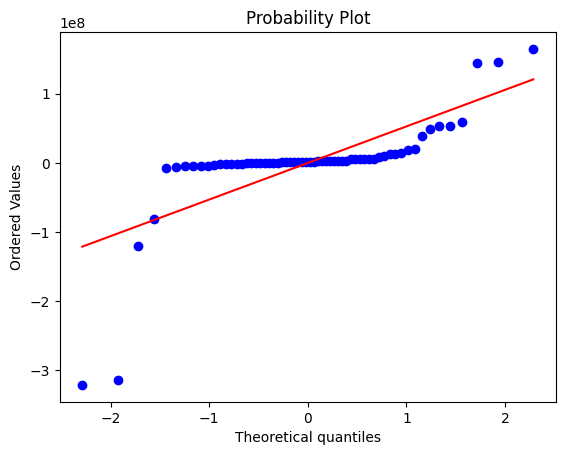

In [93]:
sts.probplot(ca_hospital_personel_merge.OperInc , dist="norm", plot=plt)

((array([-2.28632824, -1.92718526, -1.71674477, -1.56281938, -1.43895118,
         -1.33390917, -1.24182024, -1.15920615, -1.08382718, -1.01415101,
         -0.94907991, -0.88779833, -0.82968216, -0.77424185, -0.72108527,
         -0.6698925 , -0.6203983 , -0.57237956, -0.52564609, -0.48003374,
         -0.43539923, -0.39161603, -0.34857126, -0.30616308, -0.26429872,
         -0.2228927 , -0.18186549, -0.14114226, -0.10065186, -0.06032587,
         -0.02009779,  0.02009779,  0.06032587,  0.10065186,  0.14114226,
          0.18186549,  0.2228927 ,  0.26429872,  0.30616308,  0.34857126,
          0.39161603,  0.43539923,  0.48003374,  0.52564609,  0.57237956,
          0.6203983 ,  0.6698925 ,  0.72108527,  0.77424185,  0.82968216,
          0.88779833,  0.94907991,  1.01415101,  1.08382718,  1.15920615,
          1.24182024,  1.33390917,  1.43895118,  1.56281938,  1.71674477,
          1.92718526,  2.28632824]),
  array([ 12,  15,  15,  20,  25,  25,  25,  25,  26,  28,  35,  35,  37,
 

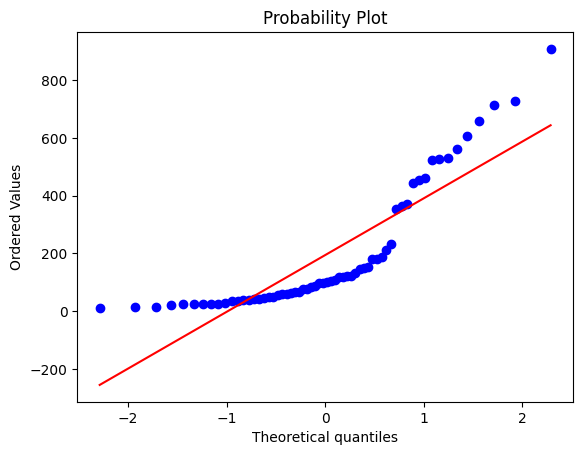

In [94]:
sts.probplot(ca_hospital_personel_merge.AvlBeds , dist="norm", plot=plt)

In [92]:
sts.shapiro(ca_hospital_personel_merge.InOperExp)

ShapiroResult(statistic=np.float64(0.6248013467209104), pvalue=np.float64(2.5420569263823017e-11))

In [95]:
sts.shapiro(ca_hospital_personel_merge.OperInc)

ShapiroResult(statistic=np.float64(0.5553974750232995), pvalue=np.float64(2.0313682290934336e-12))

In [96]:
sts.shapiro(ca_hospital_personel_merge.AvlBeds)

ShapiroResult(statistic=np.float64(0.7643354387865312), pvalue=np.float64(1.3170895897844393e-08))

All three have extremely small p-values thus do not follow a normal distribution. This is also made clear from the probability plot visually they do appear to be linear. 

## Dataset Contents

This first table provides the variables in the hospital data.

| Variable | Description |
|:---|:---|
| HospitalID | The primary key of each hospital |
| Name | The legal name of the hospital |
| Zip | Zipcode where the hospital is located |
| Website | The url for the hospital's website |
| TypeControl | Indicates the primary managing entity of the hospital |
| Teaching | Indicates teaching status |
| DonorType | This field indicates the most prominent group of donors |
| NoFTE | Number of full-time employees registered at the hospital |
| NetPatRev | Net patient revenue |
| InOperExp | Estimate of the inpatient operating costs |
| OutOperExp | Estimate of the outpatient operating costs |
| OperRev | Operating revenue of the hospital |
| OperInc | Operating Income is the operating revenue less the operating expenses |
| AvlBeds | The number of available beds in the hospital |

This second table provides the data for the personnel data.

| Variable | Description |
|:---|:---|
| HospitalID | The foreign key of the hospital where position is held |
| Work_ID | Primary key of the personnel |
| LastName | The last name of the personnel |
| FirstName | First name of the personnel |
| Gender | Gender of the individual |
| PositionID | The foreign key for the position held |
| PositionTitle | The title of this position |
| Compensation | The annual amount the position is compensated for service |
| MaxTerm | The maximum number of years an individual can serve in this position |
| StartDate | The beginning of service for this position |

#### Resource:
https://chatgpt.com/share/681042d8-e1fc-8010-83ab-6e7b0ac234fc